In [ ]:
!pip install pandas
!pip install hazm
!pip install nltk
!pip install scikit-learn matplotlib
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 

In [ ]:
!unzip dataset.zip

Archive:  dataset.zip
replace dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


Installing Necessary Packages

In [ ]:
import pandas as pd

file_path = './dataset.csv'
df = pd.read_csv(file_path)
print(df.head())



                                                Link            EN_title  \
0  https://www.imvbox.com/watch-persian-movie-ira...   Local Anaesthetic   
1  https://www.imvbox.com/watch-persian-movie-ira...         Disturbance   
2  https://www.imvbox.com/watch-persian-movie-ira...           Highlight   
3  https://www.imvbox.com/watch-persian-movie-ira...               Gilda   
4  https://www.imvbox.com/watch-persian-movie-ira...  Atmosphere Station   

     PENGLISH_title   PERSIAN_title  \
0  Bi Hessie Mozeie    بی‌حسی موضعی   
1         Ashoftegi        آشفته گی   
2           Haylayt         هایلایت   
3            Geelda           گیلدا   
4  Istgahe Atmosfer  ایستگاه اتمسفر   

                                           Content_1  \
0  جلال‌، دانشجوی سابق رشته فلسفه، متوجه می‌شود خ...   
1  «آشفته‌گی» رئالیستی و اجتماعی نیست. یک فیلم اس...   
2  یک تصادف اتومبیل آدم‌هایی را در تقابل با هم قر...   
3  گیلدا ماجرای زنی به نام «گیلدا» را روایت می کن...   
4  این فیلم روایت گر داستان 

In [ ]:
import pandas as pd

column_names = df.columns.tolist()

print(column_names)


['Link', 'EN_title', 'PENGLISH_title', 'PERSIAN_title', 'Content_1', 'Content_2', 'Score', 'Year', 'Genre', 'Time']


accoring to the dataset explanations Content_1 contains the persian storyline of the movie and Content_2 contains the english storyline of the movie

In [ ]:
import pandas as pd

# Initialize a set to collect unique genres
unique_genres = set()


# Iterate over each row in the 'genre' column
for genres in df['Genre']:
    for genre in genres.split(','):
        unique_genres.add(genre.strip())

# Convert the set to a list
unique_genres_list = list(unique_genres)

# Optionally, sort the list of unique genres
unique_genres_list.sort()

# Print the list of unique genres
print(unique_genres_list)

print(f'number of genres: '+str(len(unique_genres_list)))

['Action', 'Adventure', 'Animation', 'Architecture & Urbanism', 'Arts & Literature', 'Comedy', 'Crime', 'Culture & Traditions', 'Drama', 'Experimental', 'Family', 'History', 'Horror', 'Human Interest & Society', 'Music', 'Mystery', 'Nature & Wildlife', 'Portrait', 'Romance', 'Thriller', 'War']
number of genres: 21


Preprocesses

Normalization for persian

In [ ]:
import re
import unicodedata

def normalize_unicode(text):
    """Normalize Unicode characters to a standard form."""
    return unicodedata.normalize('NFC', text)

def normalize_arabic_persian_characters(text):
    """Normalize Arabic and Persian characters."""
    arabic_to_persian = {
        'ك': 'ک',  # Arabic Kaf to Persian Kaf
        'ي': 'ی',  # Arabic Yeh to Persian Yeh
        'ى': 'ی',  # Arabic Alef Maksura to Persian Yeh
        'ة': 'ه',  # Arabic Teh Marbuta to Persian Heh
        'ؤ': 'و',  # Arabic Waw with Hamza Above to Persian Waw
        'إ': 'ا',  # Arabic Alef with Hamza Below to Persian Alef
        'أ': 'ا',  # Arabic Alef with Hamza Above to Persian Alef
        'ٱ': 'ا',  # Arabic Alef Wasla to Persian Alef
    }
    for arabic_char, persian_char in arabic_to_persian.items():
        text = text.replace(arabic_char, persian_char)
    return text

def normalize_digits(text):
    """Normalize digits."""
    arabic_digits = '۰۱۲۳۴۵۶۷۸۹'
    persian_digits = '۰۱۲۳۴۵۶۷۸۹'
    english_digits = '0123456789'
    digit_mapping = str.maketrans(arabic_digits + persian_digits, english_digits * 2)
    return text.translate(digit_mapping)

def strip_extra_whitespace(text):
    """Strip extra whitespace."""
    return re.sub(r'\s+', ' ', text).strip()

def initial_normalization_persian(text,
                           normalize_unicode_flag=True,
                           normalize_arabic_persian_characters_flag=True,
                           normalize_digits_flag=True,
                           strip_extra_whitespace_flag=True):
    """Normalize Persian text with options to apply specific normalization steps."""
    if normalize_unicode_flag:
        text = normalize_unicode(text)
    if normalize_arabic_persian_characters_flag:
        text = normalize_arabic_persian_characters(text)
    if normalize_digits_flag:
        text = normalize_digits(text)
    if strip_extra_whitespace_flag:
        text = strip_extra_whitespace(text)
    return text

# Example usage
example_text = "كتاب‌هاي ى خوبی هستند! ۱۲۳"
normalized_text = initial_normalization_persian(example_text,
                                         normalize_unicode_flag=True,
                                         normalize_arabic_persian_characters_flag=True,
                                         normalize_digits_flag=True,
                                         strip_extra_whitespace_flag=True)
print(normalized_text)  # Output: "کتابهای خوبی هستند 123"



کتاب‌های ی خوبی هستند! 123


In [ ]:
from hazm import Stemmer, Lemmatizer

def final_normalization_persian(text,
                           stem_flag=False,
                           lemmatize_flag=False,
                           handle_suffixes_and_prefixes_flag=False):
    """Normalize Persian text with options to apply stemming, lemmatization, and handling of suffixes and prefixes."""
    # Initialize stemmer and lemmatizer
    stemmer = Stemmer()
    lemmatizer = Lemmatizer()

    # Stemming
    if stem_flag:
        text = ' '.join(stemmer.stem(word) for word in text.split())

    # Lemmatization
    if lemmatize_flag:
        text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())

    # Handling suffixes and prefixes
    if handle_suffixes_and_prefixes_flag:
        # This function can be customized based on specific suffixes and prefixes to handle
        # Currently, it's just a placeholder and does not perform any specific suffix or prefix handling
        pass

    return text

# Example usage
example_text = "کتاب‌ها گذشته‌اند و من می‌خواهم خواندنش را"
normalized_text = final_normalization_persian(example_text,
                                          stem_flag=True,
                                          lemmatize_flag=True,
                                          handle_suffixes_and_prefixes_flag=False)
print(normalized_text)


کتاب گذشت#گذر و من می‌خواه خواندن را


normalize for English

In [ ]:
import re
import string
import unicodedata
from nltk.corpus import stopwords

# Ensure stopwords are downloaded
import nltk
nltk.download('stopwords')

def normalize_unicode(text):
    """Normalize Unicode characters to a standard form."""
    return unicodedata.normalize('NFKC', text)

def to_lowercase(text):
    """Convert text to lowercase."""
    return text.lower()

def remove_punctuation(text):
    """Remove punctuation from text."""
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_digits(text):
    """Remove digits from text."""
    return re.sub(r'\d+', '', text)

def remove_extra_whitespace(text):
    """Remove extra whitespace from text."""
    return re.sub(r'\s+', ' ', text).strip()

def remove_stopwords(text):
    """Remove stop words from text."""
    stop_words = set(stopwords.words('english'))
    return ' '.join([word for word in text.split() if word not in stop_words])

def initial_normalization_english(text,
                           normalize_unicode_flag=True,
                           to_lowercase_flag=True,
                           remove_punctuation_flag=True,
                           remove_digits_flag=True,
                           remove_extra_whitespace_flag=True,
                           remove_stopwords_flag=False):
    """Normalize English text with options to apply specific normalization steps."""
    if normalize_unicode_flag:
        text = normalize_unicode(text)
    if to_lowercase_flag:
        text = to_lowercase(text)
    if remove_punctuation_flag:
        text = remove_punctuation(text)
    if remove_digits_flag:
        text = remove_digits(text)
    if remove_extra_whitespace_flag:
        text = remove_extra_whitespace(text)
    if remove_stopwords_flag:
        text = remove_stopwords(text)
    return text

# Example usage
example_text = "This is an Example! Text, with some punctuation. And numbers 12345."
normalized_text = initial_normalization_english(example_text,
                                         normalize_unicode_flag=True,
                                         to_lowercase_flag=True,
                                         remove_punctuation_flag=True,
                                         remove_digits_flag=True,
                                         remove_extra_whitespace_flag=True,
                                         remove_stopwords_flag=True)
print(normalized_text)  # Output: "example text punctuation numbers"


example text punctuation numbers


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import re
import string
import unicodedata
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from bs4 import BeautifulSoup

# Ensure stopwords are downloaded
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

def remove_urls(text):
    """Remove URLs from text."""
    return re.sub(r'http\S+', '', text)

def remove_html_tags(text):
    """Remove HTML tags from text."""
    return BeautifulSoup(text, "html.parser").get_text()

def remove_special_characters(text):
    """Remove special characters from text."""
    return re.sub(r'[^\w\s]', '', text)

def remove_accented_characters(text):
    """Remove accented characters from text."""
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

def final_normalization_english(text,
                           normalize_unicode_flag=True,
                           to_lowercase_flag=True,
                           remove_punctuation_flag=True,
                           remove_digits_flag=True,
                           remove_extra_whitespace_flag=True,
                           remove_stopwords_flag=False,
                           remove_urls_flag=False,
                           remove_html_tags_flag=False,
                           remove_special_characters_flag=False,
                           remove_accented_characters_flag=False,
                           stem_flag=False,
                           lemmatize_flag=False):
    """Normalize English text with options to apply specific preprocessing steps."""
    if remove_urls_flag:
        text = remove_urls(text)
    if remove_html_tags_flag:
        text = remove_html_tags(text)
    if remove_special_characters_flag:
        text = remove_special_characters(text)
    if remove_accented_characters_flag:
        text = remove_accented_characters(text)
    if normalize_unicode_flag:
        text = unicodedata.normalize('NFKC', text)
    if to_lowercase_flag:
        text = text.lower()
    if remove_punctuation_flag:
        text = text.translate(str.maketrans('', '', string.punctuation))
    if remove_digits_flag:
        text = re.sub(r'\d+', '', text)
    if remove_extra_whitespace_flag:
        text = re.sub(r'\s+', ' ', text).strip()
    if remove_stopwords_flag:
        stop_words = set(stopwords.words('english'))
        text = ' '.join([word for word in text.split() if word not in stop_words])
    if stem_flag:
        stemmer = PorterStemmer()
        text = ' '.join(stemmer.stem(word) for word in text.split())
    if lemmatize_flag:
        lemmatizer = WordNetLemmatizer()
        text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())
    return text

# Example usage
example_text = "This is an Example! Text, with some punctuation. And numbers 12345. Visit https://example.com"
normalized_text = final_normalization_english(example_text,
                                         normalize_unicode_flag=True,
                                         to_lowercase_flag=True,
                                         remove_punctuation_flag=True,
                                         remove_digits_flag=True,
                                         remove_extra_whitespace_flag=True,
                                         remove_stopwords_flag=True,
                                         remove_urls_flag=True,
                                         remove_html_tags_flag=True,
                                         remove_special_characters_flag=True,
                                         remove_accented_characters_flag=True,
                                         stem_flag=True,
                                         lemmatize_flag=True)
print(normalized_text)  # Output: "exampl text punctuation number visit"


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


exampl text punctuat number visit


In [ ]:
import pandas as pd

def create_filtered_datasets(file_path):
    # Read the CSV file
    df = pd.read_csv(file_path)

    # Create Persian descriptions dataset by dropping the English description column
    persian_df = df.drop(columns=['Content_2']).rename(columns={'Content_1': 'Description'})

    # Create English descriptions dataset by dropping the Persian description column
    english_df = df.drop(columns=['Content_1']).rename(columns={'Content_2': 'Description'})

    return persian_df, english_df

# Specify the path to your CSV file
file_path = './dataset.csv'

# Call the function to create the filtered datasets
persian_df, english_df = create_filtered_datasets(file_path)

# Print the first few rows of the Persian descriptions dataset
print("Persian Descriptions Dataset:")
print(persian_df.head())

# Print the first few rows of the English descriptions dataset
print("English Descriptions Dataset:")
print(english_df.head())


Persian Descriptions Dataset:
                                                Link            EN_title  \
0  https://www.imvbox.com/watch-persian-movie-ira...   Local Anaesthetic   
1  https://www.imvbox.com/watch-persian-movie-ira...         Disturbance   
2  https://www.imvbox.com/watch-persian-movie-ira...           Highlight   
3  https://www.imvbox.com/watch-persian-movie-ira...               Gilda   
4  https://www.imvbox.com/watch-persian-movie-ira...  Atmosphere Station   

     PENGLISH_title   PERSIAN_title  \
0  Bi Hessie Mozeie    بی‌حسی موضعی   
1         Ashoftegi        آشفته گی   
2           Haylayt         هایلایت   
3            Geelda           گیلدا   
4  Istgahe Atmosfer  ایستگاه اتمسفر   

                                         Description  Score  Year  Genre Time  
0  جلال‌، دانشجوی سابق رشته فلسفه، متوجه می‌شود خ...    4.8  2018  Drama   73  
1  «آشفته‌گی» رئالیستی و اجتماعی نیست. یک فیلم اس...    3.8  2018  Crime   78  
2  یک تصادف اتومبیل آدم‌هایی را در تقا

Split Datasets

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold


def split_80_10_10(df):
    # Split the data into 80% train, 10% validation, and 10% test
    train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
    val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

    return train_df, val_df, test_df

def split_90_10_with_cross_validation(df):
    # Split the data into 90% train and 10% test
    train_df, test_df = train_test_split(df, test_size=0.1, random_state=42)

    # Create KFold cross-validator with 10 folds, no shuffling
    kf = KFold(n_splits=10, shuffle=False)

    return train_df, test_df, kf



# Perform 80-10-10 split for Persian descriptions dataset
persian_train_df_80, persian_val_df_10, persian_test_df_10 = split_80_10_10(persian_df)

# Perform 80-10-10 split for English descriptions dataset
english_train_df_80, english_val_df_10, english_test_df_10 = split_80_10_10(english_df)

# Perform 90-10 split with 10-fold cross-validation for Persian descriptions dataset
persian_train_df_90, persian_test_df_10, persian_kf = split_90_10_with_cross_validation(persian_df)

# Perform 90-10 split with 10-fold cross-validation for English descriptions dataset
english_train_df_90, english_test_df_10, english_kf = split_90_10_with_cross_validation(english_df)

# Print the first few rows of the Persian descriptions dataset splits
print("Persian 80-10-10 Split - Train Dataset:")
print(persian_train_df_80.head())

print("\nPersian 80-10-10 Split - Validation Dataset:")
print(persian_val_df_10.head())

print("\nPersian 80-10-10 Split - Test Dataset:")
print(persian_test_df_10.head())

print("\nEnglish 80-10-10 Split - Train Dataset:")
print(english_train_df_80.head())

print("\nEnglish 80-10-10 Split - Validation Dataset:")
print(english_val_df_10.head())

print("\nEnglish 80-10-10 Split - Test Dataset:")
print(english_test_df_10.head())

persian_train_folds_90_10=[]
persian_test_folds_90_10=[]
english_folds_90_10=[]
english_test_folds_90_10=[]

print("\nPersian 90-10 Split - KFold Indices:")
for fold, (train_index, test_index) in enumerate(persian_kf.split(persian_train_df_90)):
    print(f"Fold {fold}:")
    print(f"  Train indices: {train_index}...")
    print(f"  Validation indices: {test_index}...")

    persian_train_folds_90_10.append(train_index)
    persian_test_folds_90_10.append(test_index)

print("\nEnglish 90-10 Split - KFold Indices:")
for fold, (train_index, test_index) in enumerate(english_kf.split(english_train_df_90)):
    print(f"Fold {fold}:")
    print(f"  Train indices: {train_index}...")
    print(f"  Validation indices: {test_index}...")

    english_folds_90_10.append(train_index)
    english_test_folds_90_10.append(test_index)



Persian 80-10-10 Split - Train Dataset:
                                                   Link  \
901   https://www.imvbox.com/watch-persian-movie-ira...   
1405  https://www.imvbox.com/watch-persian-movie-ira...   
310   https://www.imvbox.com/watch-persian-movie-ira...   
1146  https://www.imvbox.com/watch-persian-movie-ira...   
31    https://www.imvbox.com/watch-persian-movie-ira...   

                     EN_title    PENGLISH_title  PERSIAN_title  \
901      The Rule of the Game     Ghaedeye Bazi     قاعده بازی   
1405              Kamalolmolk       Kamalolmolk     کمال‌الملک   
310   The Tiger of Mazandaran  Babre Mazandaran   ببر مازندران   
1146             Fire and Fog      Atash Va Meh       آتش و مه   
31                     The 23          23 Nafar  بیست و سه نفر   

                                            Description  Score  Year  \
901   این قصه ی زندگی مردی است، که مثل خیلی از مردها...    4.2  2007   
1405  این گذری است بربخشهایی از زندگی تاریخی"محمد غف...    7.4  

you can access folds of cross validation using these four variables  <br></br>
persian_train_folds_90_10 <br></br>
persian_test_folds_90_10  <br></br>
english_folds_90_10 <br></br>
english_test_folds_90_10

Functions to calculate all necessary metrics for multiclass classification and aggregating metrics in cross validation

F1 Macro: 0.26666666666666666
F1 Micro: 0.3333333333333333
Accuracy: 0.3333333333333333
Precision: 0.2222222222222222
Recall: 0.3333333333333333


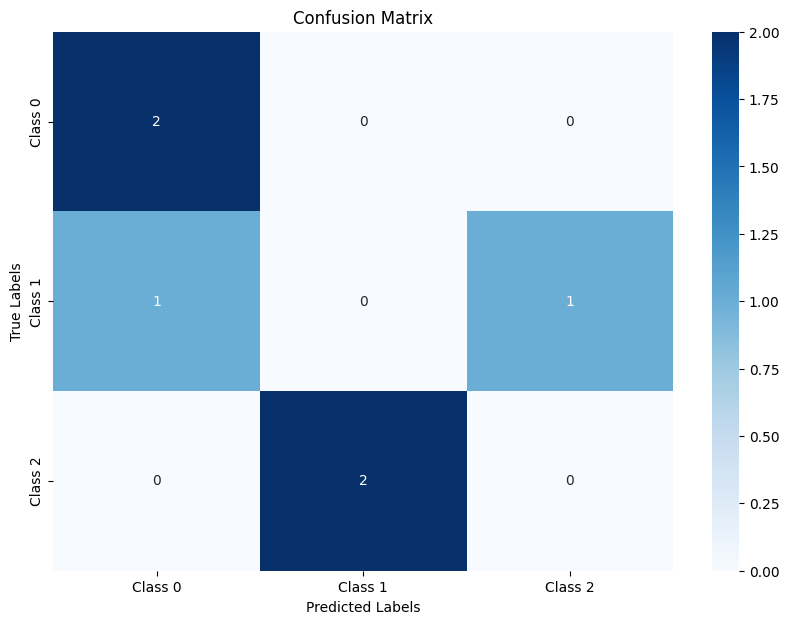

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import math

#the first two functions are for integrating the metrics that we get out of different folds in cross validation as mentioned in the assignment documentation

def calculate_average(numbers):
    if not numbers:
        return None
    return sum(numbers) / len(numbers)


def calculate_standard_deviation(numbers):
    if not numbers:
        return None
    avg = calculate_average(numbers)
    variance = sum((x - avg) ** 2 for x in numbers) / len(numbers)
    return math.sqrt(variance)



# Function to calculate F1 Macro
def f1_macro(true_labels, predicted_labels):
    return f1_score(true_labels, predicted_labels, average='macro')

# Function to calculate F1 Micro
def f1_micro(true_labels, predicted_labels):
    return f1_score(true_labels, predicted_labels, average='micro')

# Function to calculate Accuracy
def accuracy(true_labels, predicted_labels):
    return accuracy_score(true_labels, predicted_labels)

# Function to calculate Precision
def precision(true_labels, predicted_labels):
    return precision_score(true_labels, predicted_labels, average='macro')

# Function to calculate Recall
def recall(true_labels, predicted_labels):
    return recall_score(true_labels, predicted_labels, average='macro')

# Function to plot confusion matrix
def plot_confusion_matrix(true_labels, predicted_labels, class_names):
    cm = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Example usage
if __name__ == "__main__":
    # Example data
    true_labels = [0, 1, 2, 0, 1, 2]
    predicted_labels = [0, 2, 1, 0, 0, 1]
    class_names = ['Class 0', 'Class 1', 'Class 2']

    # Calculate metrics
    print("F1 Macro:", f1_macro(true_labels, predicted_labels))
    print("F1 Micro:", f1_micro(true_labels, predicted_labels))
    print("Accuracy:", accuracy(true_labels, predicted_labels))
    print("Precision:", precision(true_labels, predicted_labels))
    print("Recall:", recall(true_labels, predicted_labels))

    # Plot confusion matrix
    plot_confusion_matrix(true_labels, predicted_labels, class_names)


word classification

English dataset

In [ ]:
from datasets import load_dataset

# Load the CoNLL-2003 dataset
dataset = load_dataset('conll2003')

# Split the dataset into train, validation, and test sets
train_dataset = dataset['train']
val_dataset = dataset['validation']
test_dataset = dataset['test']


total_len= len(train_dataset) + len(val_dataset) + len(test_dataset)

train_percentage = (len(train_dataset) / total_len ) * 100
val_percentage = (len(val_dataset) / total_len ) * 100
test_percentage = (len(test_dataset) / total_len ) * 100

print(f"Train Percentage: {train_percentage:.2f}%")
print(f"Validation Percentage: {val_percentage:.2f}%")
print(f"Test Percentage: {test_percentage:.2f}%")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


The repository for conll2003 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/conll2003.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split:   0%|          | 0/14041 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3250 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3453 [00:00<?, ? examples/s]

Train Percentage: 67.69%
Validation Percentage: 15.67%
Test Percentage: 16.65%


Since conll 2003 has this default split, we do not split with a 80-10-10 anymore, as mentioned in the assignment file

data preparation for training

In [ ]:
from datasets import load_dataset

def prepare_conll_data(split):
    # Load the CoNLL-2003 dataset
    dataset = load_dataset('conll2003')

    # Extract sentences and labels from the specified split
    sentences = [example['tokens'] for example in dataset[split]]
    labels = [example['ner_tags'] for example in dataset[split]]

    return sentences, labels


train_sentences, train_labels = prepare_conll_data('train')
valid_sentences, valid_labels = prepare_conll_data('validation')
test_sentences, test_labels = prepare_conll_data('test')

# Print the first few examples
print("Training sentences:", train_sentences[:3])
print("Training labels:", train_labels[:3])


Training sentences: [['EU', 'rejects', 'German', 'call', 'to', 'boycott', 'British', 'lamb', '.'], ['Peter', 'Blackburn'], ['BRUSSELS', '1996-08-22']]
Training labels: [[3, 0, 7, 0, 0, 0, 7, 0, 0], [1, 2], [5, 0]]


data preparation of persian dataset

In [ ]:
!unzip arman.zip

Archive:  arman.zip
  inflating: arman-labels.txt        
  inflating: arman-tokens.txt        
  inflating: peyma-labels.txt        
  inflating: peyma-tokens.txt        


don't forget to test word classification on 10 persian and 10 english film names

In [ ]:
def read_tokens_and_labels(tokens_file_path, labels_file_path):
    # Initialize lists to store sentences and labels
    sentences = []
    labels = []

    # Open and read the tokens and labels files with error handling for encoding issues
    with open(tokens_file_path, 'r', encoding='utf-8', errors='replace') as tokens_file, \
         open(labels_file_path, 'r', encoding='utf-8', errors='replace') as labels_file:

        # Read all lines from both files
        token_lines = tokens_file.readlines()
        label_lines = labels_file.readlines()

        # Ensure both files have the same number of lines
        assert len(token_lines) == len(label_lines), "Files must have the same number of lines."

        # Process each line
        for token_line, label_line in zip(token_lines, label_lines):
            # Split the lines into tokens and labels
            tokens = token_line.strip().split()
            labels_ = label_line.strip().split()

            # Ensure each line has the same number of tokens and labels
            assert len(tokens) == len(labels_), "Each line must have the same number of tokens and labels."

            sentences.append(tokens)
            labels.append(labels_)

    # Flatten the list of sentences and labels for the DataFrame
    flat_tokens = [token for sentence in sentences for token in sentence]
    flat_labels = [label for label_list in labels for label in label_list]

    # Create a DataFrame
    df = pd.DataFrame({'Token': flat_tokens, 'Label': flat_labels})

    return df


tokens_file_path = 'arman-tokens.txt'
labels_file_path = 'arman-labels.txt'
df = read_tokens_and_labels(tokens_file_path, labels_file_path)



# Save the DataFrame to a CSV file
df.to_csv('arman_dataset.csv', index=False)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold

# Function to read CSV into DataFrame
def read_csv(file_path):
    return pd.read_csv(file_path)

# Function for 80-10-10 split
def split_80_10_10(df):
    train_val_df, test_df = train_test_split(df, test_size=0.10, random_state=42)
    train_df, val_df = train_test_split(train_val_df, test_size=0.11, random_state=42) # 0.11 * 0.9 ≈ 0.10
    return train_df, val_df, test_df

# Function for 90-10 split
def split_90_10(df):
    train_df, test_df = train_test_split(df, test_size=0.10, random_state=42)
    return train_df, test_df

# Function for 10-fold cross-validation on the 90-10 split
def cross_validation_10_folds(df):
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    fold_data = []
    for train_index, test_index in kf.split(df):
        train_df = df.iloc[train_index]
        test_df = df.iloc[test_index]
        fold_data.append((train_df, test_df))
    return fold_data

# Read the CSV file
file_path = 'arman_dataset.csv'
df = read_csv(file_path)

# Perform 80-10-10 split
train_df_80_10_10, val_df_80_10_10, test_df_80_10_10 = split_80_10_10(df)
print("80-10-10 split:")
print(f"Train set size: {len(train_df_80_10_10)}")
print(f"Validation set size: {len(val_df_80_10_10)}")
print(f"Test set size: {len(test_df_80_10_10)}")

# Perform 90-10 split
train_df_90_10, test_df_90_10 = split_90_10(df)
print("\n90-10 split:")
print(f"Train set size: {len(train_df_90_10)}")
print(f"Test set size: {len(test_df_90_10)}")




# Perform 10-fold cross-validation on the 90-10 split
fold_data = cross_validation_10_folds(train_df_90_10)
print("\n10-fold cross-validation on the 90-10 split:")

train_folds_90_10 = []
test_folds_90_10 = []

for i, (train_fold, test_fold) in enumerate(fold_data):
    print(f"Fold {i+1}:")
    print(f"Train fold size: {len(train_fold)}")
    print(f"Validation fold size: {len(test_fold)}")
    train_folds_90_10.append(train_fold)
    test_folds_90_10.append(test_fold)





80-10-10 split:
Train set size: 600740
Validation set size: 74249
Test set size: 74999

90-10 split:
Train set size: 674989
Test set size: 74999

10-fold cross-validation on the 90-10 split:
Fold 1:
Train fold size: 607490
Validation fold size: 67499
Fold 2:
Train fold size: 607490
Validation fold size: 67499
Fold 3:
Train fold size: 607490
Validation fold size: 67499
Fold 4:
Train fold size: 607490
Validation fold size: 67499
Fold 5:
Train fold size: 607490
Validation fold size: 67499
Fold 6:
Train fold size: 607490
Validation fold size: 67499
Fold 7:
Train fold size: 607490
Validation fold size: 67499
Fold 8:
Train fold size: 607490
Validation fold size: 67499
Fold 9:
Train fold size: 607490
Validation fold size: 67499
Fold 10:
Train fold size: 607491
Validation fold size: 67498


# Token classification

## BERT

## English

In [ ]:
pip install transformers datasets torch

In [ ]:
!pip install seqeval

In [ ]:
!pip install transformers[torch] accelerate -U

In [ ]:
import torch
import numpy as np
from transformers import BertTokenizerFast, BertForTokenClassification, Trainer, TrainingArguments
from datasets import load_dataset, load_metric

# Step 1: Prepare the data
def prepare_conll_data():
    # Load the CoNLL-2003 dataset
    dataset = load_dataset('conll2003')
    return dataset

dataset = prepare_conll_data()

# Step 2: Tokenize the data
tokenizer = BertTokenizerFast.from_pretrained('bert-base-cased')

def tokenize_and_align_labels(examples):
    tokenized_inputs = tokenizer(examples['tokens'], truncation=True, is_split_into_words=True, padding='max_length', max_length=128)
    labels = []
    for i, label in enumerate(examples['ner_tags']):
        word_ids = tokenized_inputs.word_ids(batch_index=i)
        previous_word_idx = None
        label_ids = []
        for word_idx in word_ids:
            if word_idx is None:
                label_ids.append(-100)
            elif word_idx != previous_word_idx:
                label_ids.append(label[word_idx])
            else:
                label_ids.append(-100)
            previous_word_idx = word_idx
        labels.append(label_ids)
    tokenized_inputs["labels"] = labels
    return tokenized_inputs

tokenized_datasets = dataset.map(tokenize_and_align_labels, batched=True)

# Step 3: Create a dataset object suitable for the model
train_dataset = tokenized_datasets["train"]
eval_dataset = tokenized_datasets["validation"]
test_dataset = tokenized_datasets["test"]

# Step 4: Define the model and training arguments
label_list = dataset["train"].features["ner_tags"].feature.names
model = BertForTokenClassification.from_pretrained('bert-base-cased', num_labels=len(label_list))

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
)

# Step 5: Define the compute_metrics function
metric = load_metric("seqeval")

def compute_metrics(p):
    predictions = np.argmax(p.predictions, axis=2)
    labels = p.label_ids

    true_labels = [[label_list[l] for l in label if l != -100] for label in labels]
    true_predictions = [[label_list[p] for (p, l) in zip(prediction, label) if l != -100] for prediction, label in zip(predictions, labels)]

    results = metric.compute(predictions=true_predictions, references=true_labels)
    return {
        "precision": results["overall_precision"],
        "recall": results["overall_recall"],
        "f1": results["overall_f1"],
        "accuracy": results["overall_accuracy"],
    }

# Step 6: Train the model
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

trainer.train()

In [ ]:
# Step 7: Evaluate the model
eval_results = trainer.evaluate()
print("Evaluation Results:", eval_results)

Evaluation Results: {'eval_loss': 0.04197642579674721, 'eval_precision': 0.9459866220735786, 'eval_recall': 0.9529986522911051, 'eval_f1': 0.9494796911715341, 'eval_accuracy': 0.9914073612220642, 'eval_runtime': 24.2254, 'eval_samples_per_second': 134.157, 'eval_steps_per_second': 16.801, 'epoch': 3.0}


In [ ]:
# Step 8: Make predictions on the test dataset
test_results = trainer.predict(test_dataset)
print("Test Results:", compute_metrics(test_results))

Test Results: {'precision': 0.9065780265920224, 'recall': 0.9181431608788093, 'f1': 0.9123239436619719, 'accuracy': 0.9827433914298641}


Test Results: {'precision': 0.9065780265920224, 'recall': 0.9181431608788093, 'f1': 0.9123239436619719, 'accuracy': 0.9827433914298641}


<Figure size 1000x800 with 0 Axes>

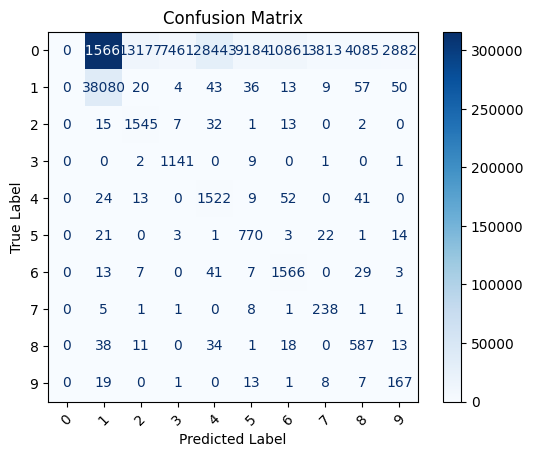

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Extract true labels from the test dataset
true_labels = test_dataset["labels"]

# Extract predicted labels from test_results
predicted_labels = np.argmax(test_results.predictions, axis=2)

# Flatten the labels to compute confusion matrix
true_labels_flat = np.concatenate(true_labels)
predicted_labels_flat = np.concatenate(predicted_labels)

# Compute confusion matrix
cm = confusion_matrix(true_labels_flat, predicted_labels_flat)

# Define class names (replace with your actual class names)
class_names = ['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC']

# Plot confusion matrix
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)
plt.show()

In [ ]:
movie_names = [
    ("Captain America", "O B-LOC"),
    ("The Last King of Scotland", "O O O O B-LOC"),
    ("Madagascar", "B-LOC"),
    ("The Lion King", "O O O"),
    ("Good Morning China", "O O B-LOC"),
    ("The Philadelphia Story", "O B-LOC O"),
    ("Midnight in Paris", "O O B-LOC"),
    ("John Jones", "B-PER I-PER"),
    ("The Prince of Egypt", "O O O B-LOC"),
    ("The Wolf of Wall Street", "O O O B-LOC I-LOC")
]

In [ ]:
for name in movie_names:
    sent = name[0]
    words = sent.lower().split()
    result = trainer.predict(words)
    for i,w in result:
        print(f"{w} -> {id2tag[i]}")
    print(name[1])
    print("-" * 30)

captain -> O
america -> B-LOC
O B-LOC
------------------------------
the -> O
last -> O
king -> O
of -> O
scotland -> B-LOC
O O O O B-LOC
------------------------------
madagascar -> B-LOC
B-LOC
------------------------------
the -> O
lion -> O
king -> O
O O O
------------------------------
good -> O
morning -> O
china -> B-LOC
O O B-LOC
------------------------------
the -> O
philadelphia -> B-LOC
story -> O
O B-LOC O
------------------------------
midnight -> O
in -> O
paris -> B-LOC
O O B-LOC
------------------------------
john -> B-PER
jones -> I-PER
B-PER I-PER
------------------------------
the -> O
prince -> O
of -> O
egypt -> B-LOC
O O O B-LOC
------------------------------
the -> O
wolf -> O
of -> O
wall -> O
street -> B-LOC
O O O B-LOC I-LOC
------------------------------



## Persian

In [ ]:
!unzip arman.zip

In [ ]:
import pandas as pd

In [ ]:
def read_tokens_and_labels(tokens_file_path, labels_file_path):
    sentences = []
    labels = []

    with open(tokens_file_path, 'r', encoding='utf-8', errors='replace') as tokens_file, \
         open(labels_file_path, 'r', encoding='utf-8', errors='replace') as labels_file:

        token_lines = tokens_file.readlines()
        label_lines = labels_file.readlines()

        assert len(token_lines) == len(label_lines), "Files must have the same number of lines."

        for token_line, label_line in zip(token_lines, label_lines):
            tokens = token_line.strip().split()
            labels_ = label_line.strip().split()

            assert len(tokens) == len(labels_), "Each line must have the same number of tokens and labels."

            sentences.append(tokens)
            labels.append(labels_)

    flat_tokens = [token for sentence in sentences for token in sentence]
    flat_labels = [label for label_list in labels for label in label_list]

    df = pd.DataFrame({'Token': flat_tokens, 'Label': flat_labels})

    return df, sentences, labels


tokens_file_path = 'arman-tokens.txt'
labels_file_path = 'arman-labels.txt'
df, sentences, labels = read_tokens_and_labels(tokens_file_path, labels_file_path)

In [ ]:
df.head(20)

,Token,Label
0,افقی,O
1,:,O
2,0,O
3,ـ,O
4,از,O
5,عوامل,O
6,دوران,O
7,پهلوی,O
8,و,O
9,نخست‌وزیر,O


In [ ]:
ner_count = df['Label'].value_counts()
print(ner_count)

Label
O          674907
I-org       16509
B-org       13599
B-loc       10224
B-pers       9825
I-pers       5820
I-event      5817
I-fac        2808
I-loc        2700
I-pro        2217
B-pro        2172
B-event      1740
B-fac        1650
Name: count, dtype: int64


In [ ]:
all_unique_ne = df['Label'].unique().tolist()
ne2id = dict()
id2ne = dict()

for i, ne in enumerate(all_unique_ne):
    ne2id[ne] = i
    id2ne[i] = ne

In [ ]:
import random

def split_data(list1, list2, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1, random_seed=42):
    if len(list1) != len(list2):
        raise ValueError("Both lists must have the same length")

    if random_seed is not None:
        random.seed(random_seed)

    indices = list(range(len(list1)))
    random.shuffle(indices)

    train_size = int(len(list1) * train_ratio)
    val_size = int(len(list1) * val_ratio)

    train_indices = indices[:train_size]
    val_indices = indices[train_size:train_size + val_size]
    test_indices = indices[train_size + val_size:]

    list1_train = [list1[i] for i in train_indices]
    list1_val = [list1[i] for i in val_indices]
    list1_test = [list1[i] for i in test_indices]

    list2_train = [list2[i] for i in train_indices]
    list2_val = [list2[i] for i in val_indices]
    list2_test = [list2[i] for i in test_indices]

    return list1_train, list1_val, list1_test, list2_train, list2_val, list2_test

sentences_train, sentences_valid, sentences_test, labels_train, labels_valid, labels_test = split_data(sentences, labels, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1, random_seed=42)

In [ ]:
import string

In [ ]:
counter_dict = {}
stop_words = ['و', 'در', 'به', 'از', 'كه', 'مي', 'اين', 'است', 'را', 'با', 'هاي', 'براي', 'آن', 'يك', 'شود', 'شده', 'خود', 'ها', 'كرد', 'شد', 'اي', 'تا', 'كند', 'بر', 'بود', 'گفت', 'نيز', 'وي', 'هم', 'كنند', 'دارد', 'ما', 'كرده', 'يا', 'اما', 'بايد', 'دو', 'اند', 'هر', 'خواهد', 'او', 'مورد', 'آنها', 'باشد', 'ديگر', 'مردم', 'نمي', 'بين', 'پيش', 'پس', 'اگر', 'همه', 'صورت', 'يكي', 'هستند', 'بي', 'من', 'دهد', 'هزار', 'نيست', 'استفاده', 'داد', 'داشته', 'راه', 'داشت', 'چه', 'همچنين', 'كردند', 'داده', 'بوده', 'دارند', 'همين', 'ميليون', 'سوي', 'شوند', 'بيشتر', 'بسيار', 'روي', 'گرفته', 'هايي', 'تواند', 'اول', 'نام', 'هيچ', 'چند', 'جديد', 'بيش', 'شدن', 'كردن', 'كنيم', 'نشان', 'حتي', 'اينكه', 'ولی', 'توسط', 'چنين', 'برخي', 'نه', 'ديروز', 'دوم', 'درباره', 'بعد', 'مختلف', 'گيرد', 'شما', 'گفته', 'آنان', 'بار', 'طور', 'گرفت', 'دهند', 'گذاري', 'بسياري', 'طي', 'بودند', 'ميليارد', 'بدون', 'تمام', 'كل', 'تر  براساس', 'شدند', 'ترين', 'امروز', 'باشند', 'ندارد', 'چون', 'قابل', 'گويد', 'ديگري', 'همان', 'خواهند', 'قبل', 'آمده', 'اكنون', 'تحت', 'طريق', 'گيري', 'جاي', 'هنوز', 'چرا', 'البته', 'كنيد', 'سازي', 'سوم', 'كنم', 'بلكه', 'زير', 'توانند', 'ضمن', 'فقط', 'بودن', 'حق', 'آيد', 'وقتي', 'اش', 'يابد', 'نخستين', 'مقابل', 'خدمات', 'امسال', 'تاكنون', 'مانند', 'تازه', 'آورد', 'فكر', 'آنچه', 'نخست', 'نشده', 'شايد', 'چهار', 'جريان', 'پنج', 'ساخته', 'زيرا', 'نزديك', 'برداري', 'كسي', 'ريزي', 'رفت', 'گردد', 'مثل', 'آمد', 'ام', 'بهترين', 'دانست', 'كمتر', 'دادن', 'تمامي', 'جلوگيري', 'بيشتري', 'ايم', 'ناشي', 'چيزي', 'آنكه', 'بالا', 'بنابراين', 'ايشان', 'بعضي', 'دادند', 'داشتند', 'برخوردار', 'نخواهد', 'هنگام', 'نبايد', 'غير', 'نبود', 'ديده', 'وگو', 'داريم', 'چگونه', 'بندي', 'خواست', 'فوق', 'ده', 'نوعي', 'هستيم', 'ديگران', 'همچنان', 'سراسر', 'ندارند', 'گروهي', 'سعي', 'روزهاي', 'آنجا', 'يكديگر', 'كردم', 'بيست', 'بروز', 'سپس', 'رفته', 'آورده', 'نمايد', 'باشيم', 'گويند', 'زياد', 'خويش', 'همواره', 'گذاشته', 'شش  نداشته', 'شناسي', 'خواهيم', 'آباد', 'داشتن', 'نظير', 'همچون', 'باره', 'نكرده', 'شان', 'سابق', 'هفت', 'دانند', 'جايي', 'بی', 'جز', 'زیرِ', 'رویِ', 'سریِ', 'تویِ', 'جلویِ', 'پیشِ', 'عقبِ', 'بالایِ', 'خارجِ', 'وسطِ', 'بیرونِ', 'سویِ', 'کنارِ', 'پاعینِ', 'نزدِ', 'نزدیکِ', 'دنبالِ', 'حدودِ', 'برابرِ', 'طبقِ', 'مانندِ', 'ضدِّ', 'هنگامِ', 'برایِ', 'مثلِ', 'بارة', 'اثرِ', 'تولِ', 'علّتِ', 'سمتِ', 'عنوانِ', 'قصدِ', 'روب', 'جدا', 'کی', 'که', 'چیست', 'هست', 'کجا', 'کجاست', 'کَی', 'چطور', 'کدام', 'آیا', 'مگر', 'چندین', 'یک', 'چیزی', 'دیگر', 'کسی', 'بعری', 'هیچ', 'چیز', 'جا', 'کس', 'هرگز', 'یا', 'تنها', 'بلکه', 'خیاه', 'بله', 'بلی', 'آره', 'آری', 'مرسی', 'البتّه', 'لطفاً', 'ّه', 'انکه', 'وقتیکه', 'همین', 'پیش', 'مدّتی', 'هنگامی', 'مان', 'تان']

def ner_statistics(sentences_list, label_list):
    global counter_dict, stop_words
    for i in range(len(label_list)):
        current_sentence = sentences_list[i]
        current_label_list = label_list[i]
        for j in range(len(current_label_list)):
            current_token = current_sentence[j]
            current_label = current_label_list[j]
            if current_token not in stop_words and current_token not in string.punctuation:
                if current_label not in counter_dict.keys():
                    counter_dict[current_label] = 0
                counter_dict[current_label] += 1

ner_statistics(sentences_train, labels_train)
ner_statistics(sentences_valid, labels_valid)
ner_statistics(sentences_test, labels_test)
print(counter_dict)

{'O': 420375, 'B-loc': 10221, 'B-org': 13572, 'I-org': 15420, 'B-pers': 9825, 'I-pers': 5742, 'B-pro': 2121, 'B-event': 1740, 'I-event': 5508, 'I-loc': 2613, 'B-fac': 1650, 'I-fac': 2739, 'I-pro': 1971}


In [ ]:
stop_words = ['و', 'در', 'به', 'از', 'كه', 'مي', 'اين', 'است', 'را', 'با', 'هاي', 'براي', 'آن', 'يك', 'شود', 'شده', 'خود', 'ها', 'كرد', 'شد', 'اي', 'تا', 'كند', 'بر', 'بود', 'گفت', 'نيز', 'وي', 'هم', 'كنند', 'دارد', 'ما', 'كرده', 'يا', 'اما', 'بايد', 'دو', 'اند', 'هر', 'خواهد', 'او', 'مورد', 'آنها', 'باشد', 'ديگر', 'مردم', 'نمي', 'بين', 'پيش', 'پس', 'اگر', 'همه', 'صورت', 'يكي', 'هستند', 'بي', 'من', 'دهد', 'هزار', 'نيست', 'استفاده', 'داد', 'داشته', 'راه', 'داشت', 'چه', 'همچنين', 'كردند', 'داده', 'بوده', 'دارند', 'همين', 'ميليون', 'سوي', 'شوند', 'بيشتر', 'بسيار', 'روي', 'گرفته', 'هايي', 'تواند', 'اول', 'نام', 'هيچ', 'چند', 'جديد', 'بيش', 'شدن', 'كردن', 'كنيم', 'نشان', 'حتي', 'اينكه', 'ولی', 'توسط', 'چنين', 'برخي', 'نه', 'ديروز', 'دوم', 'درباره', 'بعد', 'مختلف', 'گيرد', 'شما', 'گفته', 'آنان', 'بار', 'طور', 'گرفت', 'دهند', 'گذاري', 'بسياري', 'طي', 'بودند', 'ميليارد', 'بدون', 'تمام', 'كل', 'تر  براساس', 'شدند', 'ترين', 'امروز', 'باشند', 'ندارد', 'چون', 'قابل', 'گويد', 'ديگري', 'همان', 'خواهند', 'قبل', 'آمده', 'اكنون', 'تحت', 'طريق', 'گيري', 'جاي', 'هنوز', 'چرا', 'البته', 'كنيد', 'سازي', 'سوم', 'كنم', 'بلكه', 'زير', 'توانند', 'ضمن', 'فقط', 'بودن', 'حق', 'آيد', 'وقتي', 'اش', 'يابد', 'نخستين', 'مقابل', 'خدمات', 'امسال', 'تاكنون', 'مانند', 'تازه', 'آورد', 'فكر', 'آنچه', 'نخست', 'نشده', 'شايد', 'چهار', 'جريان', 'پنج', 'ساخته', 'زيرا', 'نزديك', 'برداري', 'كسي', 'ريزي', 'رفت', 'گردد', 'مثل', 'آمد', 'ام', 'بهترين', 'دانست', 'كمتر', 'دادن', 'تمامي', 'جلوگيري', 'بيشتري', 'ايم', 'ناشي', 'چيزي', 'آنكه', 'بالا', 'بنابراين', 'ايشان', 'بعضي', 'دادند', 'داشتند', 'برخوردار', 'نخواهد', 'هنگام', 'نبايد', 'غير', 'نبود', 'ديده', 'وگو', 'داريم', 'چگونه', 'بندي', 'خواست', 'فوق', 'ده', 'نوعي', 'هستيم', 'ديگران', 'همچنان', 'سراسر', 'ندارند', 'گروهي', 'سعي', 'روزهاي', 'آنجا', 'يكديگر', 'كردم', 'بيست', 'بروز', 'سپس', 'رفته', 'آورده', 'نمايد', 'باشيم', 'گويند', 'زياد', 'خويش', 'همواره', 'گذاشته', 'شش  نداشته', 'شناسي', 'خواهيم', 'آباد', 'داشتن', 'نظير', 'همچون', 'باره', 'نكرده', 'شان', 'سابق', 'هفت', 'دانند', 'جايي', 'بی', 'جز', 'زیرِ', 'رویِ', 'سریِ', 'تویِ', 'جلویِ', 'پیشِ', 'عقبِ', 'بالایِ', 'خارجِ', 'وسطِ', 'بیرونِ', 'سویِ', 'کنارِ', 'پاعینِ', 'نزدِ', 'نزدیکِ', 'دنبالِ', 'حدودِ', 'برابرِ', 'طبقِ', 'مانندِ', 'ضدِّ', 'هنگامِ', 'برایِ', 'مثلِ', 'بارة', 'اثرِ', 'تولِ', 'علّتِ', 'سمتِ', 'عنوانِ', 'قصدِ', 'روب', 'جدا', 'کی', 'که', 'چیست', 'هست', 'کجا', 'کجاست', 'کَی', 'چطور', 'کدام', 'آیا', 'مگر', 'چندین', 'یک', 'چیزی', 'دیگر', 'کسی', 'بعری', 'هیچ', 'چیز', 'جا', 'کس', 'هرگز', 'یا', 'تنها', 'بلکه', 'خیاه', 'بله', 'بلی', 'آره', 'آری', 'مرسی', 'البتّه', 'لطفاً', 'ّه', 'انکه', 'وقتیکه', 'همین', 'پیش', 'مدّتی', 'هنگامی', 'مان', 'تان']

def delete_stopwords_and_punctuations(sentences_list, label_list):
    global stop_words
    new_sentence_list = list()
    new_label_list = list()
    for i in range(len(label_list)):
        current_sentence = sentences_list[i]
        current_label_list = label_list[i]
        new_current_sentence = list()
        new_current_label_list = list()
        for j in range(len(current_label_list)):
            current_token = current_sentence[j]
            current_label = current_label_list[j]
            if current_token not in stop_words and current_token not in string.punctuation:
                new_current_sentence.append(current_token.lower())
                new_current_label_list.append(current_label)
        new_sentence_list.append(new_current_sentence)
        new_label_list.append(new_current_label_list)
    return new_sentence_list, new_label_list

new_train_sentences, new_train_labels = delete_stopwords_and_punctuations(sentences_train, labels_train)
new_valid_sentences, new_valid_labels = delete_stopwords_and_punctuations(sentences_valid, labels_valid)
new_test_sentences, new_test_labels = delete_stopwords_and_punctuations(sentences_test, labels_test)

In [ ]:
import numpy as np

In [ ]:
sentences = [item for sublist in new_train_sentences for item in sublist]
labels = [item for sublist in new_train_labels for item in sublist]

sentence_markers = []
sentence_counter = 1
for sublist in new_train_sentences:
    if len(sublist) != len([f"Sentence: {sentence_counter}"] + [np.nan] * (len(sublist) - 1)):
        continue
    sentence_markers.extend([f"Sentence: {sentence_counter}"] + [np.nan] * (len(sublist) - 1))
    sentence_counter += 1

df = pd.DataFrame({
    'Sentence #': sentence_markers,
    'Word': sentences,
    'POS': [np.nan] * len(sentences),
    'Tag': labels
})

print(df)

         Sentence #        Word  POS      Tag
0       Sentence: 1    بنابراین  NaN        O
1               NaN       رابطه  NaN        O
2               NaN      روحانی  NaN        O
3               NaN       رابطه  NaN        O
4               NaN     دیالوگی  NaN        O
...             ...         ...  ...      ...
395184          NaN        رئال  NaN    B-org
395185          NaN     سوپرجام  NaN  B-event
395186          NaN       اروپا  NaN  I-event
395187          NaN  گالاتاسرای  NaN    B-org
395188          NaN         دست  NaN        O

[395189 rows x 4 columns]


In [ ]:
df

,Sentence #,Word,POS,Tag
0,Sentence: 1,بنابراین,NaN,O
1,NaN,رابطه,NaN,O
2,NaN,روحانی,NaN,O
3,NaN,رابطه,NaN,O
4,NaN,دیالوگی,NaN,O
...,...,...,...,...
395184,NaN,رئال,NaN,B-org
395185,NaN,سوپرجام,NaN,B-event
395186,NaN,اروپا,NaN,I-event
395187,NaN,گالاتاسرای,NaN,B-org


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizerFast, BertForTokenClassification, Trainer, TrainingArguments
from seqeval.metrics import classification_report, accuracy_score, f1_score

# Fill NaN values in 'Sentence #' and create sentence groups
df['Sentence #'] = df['Sentence #'].fillna(method='ffill')

# Extract sentences and tags
sentences = df.groupby('Sentence #')['Word'].apply(list).values
tags = df.groupby('Sentence #')['Tag'].apply(list).values

# Define unique tags
unique_tags = set(tag for doc in tags for tag in doc)
tag2id = {tag: id for id, tag in enumerate(unique_tags)}
id2tag = {id: tag for tag, id in tag2id.items()}

# Tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

# Encoding function
def encode_tags(tags, encodings):
    labels = []
    for doc_labels, doc_offset in zip(tags, encodings.offset_mapping):
        doc_enc_labels = np.ones(len(doc_offset), dtype=int) * -100
        arr_offset = np.array(doc_offset)

        label_index = 0
        for i, offset in enumerate(arr_offset):
            if offset[0] == 0 and offset[1] != 0:
                doc_enc_labels[i] = tag2id[doc_labels[label_index]]
                label_index += 1

        labels.append(doc_enc_labels.tolist())
    return labels

# Encode sentences
encodings = tokenizer(list(sentences), is_split_into_words=True, return_offsets_mapping=True, padding=True, truncation=True)
labels = encode_tags(tags, encodings)
encodings.pop("offset_mapping")  # We don't need offset mappings anymore

# Split data into train and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(list(sentences), labels, test_size=0.2)

# Re-encode split data
train_encodings = tokenizer(train_sentences, is_split_into_words=True, padding=True, truncation=True)
val_encodings = tokenizer(val_sentences, is_split_into_words=True, padding=True, truncation=True)

# Dataset class
class NERDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Create Dataset objects
train_dataset = NERDataset(train_encodings, train_labels)
val_dataset = NERDataset(val_encodings, val_labels)

# Load BERT model
model = BertForTokenClassification.from_pretrained('bert-base-uncased', num_labels=len(unique_tags))

# Define the metrics function
def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=2)

    # Remove ignored index (special tokens)
    true_labels = [[id2tag[l] for l in label if l != -100] for label in labels]
    true_predictions = [
        [id2tag[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]

    return {
        "accuracy": accuracy_score(true_labels, true_predictions),
        "f1": f1_score(true_labels, true_predictions),
        "classification_report": classification_report(true_labels, true_predictions)
    }

# Training arguments
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=3,              # total number of training epochs
    per_device_train_batch_size=16,  # batch size for training
    per_device_eval_batch_size=16,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
    evaluation_strategy="epoch"
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

# Train the model
trainer.train()

# Save the model
model.save_pretrained("./ner_model")
tokenizer.save_pretrained("./ner_model")

# Evaluate the model
eval_results = trainer.evaluate()
print(eval_results)

# Detailed classification report
predictions, labels, _ = trainer.predict(val_dataset)
predictions = np.argmax(predictions, axis=2)

true_labels = [[id2tag[l] for l in label if l != -100] for label in labels]
true_predictions = [
    [id2tag[p] for (p, l) in zip(prediction, label) if l != -100]
    for prediction, label in zip(predictions, labels)
]

print(classification_report(true_labels, true_predictions))


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Classification Report
1,0.299300,0.270560,0.928722,0.531637,precision recall f1-score support event 0.22 0.23 0.22 288 fac 0.40 0.25 0.31 300 loc 0.60 0.48 0.54 1598 org 0.57 0.54 0.55 2137 pers 0.75 0.55 0.64 1528 pro 0.67 0.20 0.31 348 micro avg 0.59 0.48 0.53 6199 macro avg 0.53 0.38 0.43 6199 weighted avg 0.60 0.48 0.53 6199
2,0.135100,0.135683,0.960814,0.715029,precision recall f1-score support event 0.40 0.50 0.44 288 fac 0.54 0.58 0.56 300 loc 0.68 0.74 0.71 1598 org 0.72 0.72 0.72 2137 pers 0.83 0.84 0.83 1528 pro 0.70 0.40 0.51 348 micro avg 0.71 0.72 0.72 6199 macro avg 0.65 0.63 0.63 6199 weighted avg 0.71 0.72 0.71 6199
3,0.067300,0.105787,0.970732,0.781235,precision recall f1-score support event 0.51 0.60 0.55 288 fac 0.62 0.68 0.65 300 loc 0.76 0.83 0.79 1598 org 0.76 0.81 0.78 2137 pers 0.86 0.88 0.87 1528 pro 0.68 0.61 0.64 348 micro avg 0.76 0.81 0.78 6199 macro avg 0.70 0.74 0.72 6199 weighted avg 0.76 0.81 0.78 6199


Trainer is attempting to log a value of "              precision    recall  f1-score   support

       event       0.22      0.23      0.22       288
         fac       0.40      0.25      0.31       300
         loc       0.60      0.48      0.54      1598
         org       0.57      0.54      0.55      2137
        pers       0.75      0.55      0.64      1528
         pro       0.67      0.20      0.31       348

   micro avg       0.59      0.48      0.53      6199
   macro avg       0.53      0.38      0.43      6199
weighted avg       0.60      0.48      0.53      6199
" of type <class 'str'> for key "eval/classification_report" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "              precision    recall  f1-score   support

       event       0.40      0.50      0.44       288
         fac       0.54      0.58      0.56       300
         loc       0.68      0.74      0.71

Trainer is attempting to log a value of "              precision    recall  f1-score   support

       event       0.51      0.60      0.55       288
         fac       0.62      0.68      0.65       300
         loc       0.76      0.83      0.79      1598
         org       0.76      0.81      0.78      2137
        pers       0.86      0.88      0.87      1528
         pro       0.68      0.61      0.64       348

   micro avg       0.76      0.81      0.78      6199
   macro avg       0.70      0.74      0.72      6199
weighted avg       0.76      0.81      0.78      6199
" of type <class 'str'> for key "eval/classification_report" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


{'eval_loss': 0.10578726977109909, 'eval_accuracy': 0.9707322060759429, 'eval_f1': 0.7812353401094605, 'eval_classification_report': '              precision    recall  f1-score   support\n\n       event       0.51      0.60      0.55       288\n         fac       0.62      0.68      0.65       300\n         loc       0.76      0.83      0.79      1598\n         org       0.76      0.81      0.78      2137\n        pers       0.86      0.88      0.87      1528\n         pro       0.68      0.61      0.64       348\n\n   micro avg       0.76      0.81      0.78      6199\n   macro avg       0.70      0.74      0.72      6199\nweighted avg       0.76      0.81      0.78      6199\n', 'eval_runtime': 112.8585, 'eval_samples_per_second': 32.66, 'eval_steps_per_second': 2.047, 'epoch': 3.0}
              precision    recall  f1-score   support

       event       0.51      0.60      0.55       288
         fac       0.62      0.68      0.65       300
         loc       0.76      0.83      0

In [ ]:
movie_titles = [
    ("قصه شیراز", "O B-LOC"),
    ("خانه روی آب", "O O O"),
    ("سفر تهران", "O B-LOC"),
    ("پسر ایرانی", "O B-LOC"),
    ("ملاقات شهید چمران", "O O B-PER"),
    ("داستان شرکت سایپا", "O B-ORG I-ORG"),
    ("رضا محمدی", "B-PER I-PER"),
    ("زندگی عاشقانه", "O O"),
    ("اصفهان زیبا", "B-LOC O"),
    ("جنگ ایران عراق", "O B-ORG I-ORG")
]

In [ ]:
for movie in movie_titles:
    sent = movie[0]
    words = sent.lower().split()
    result = trainer.predict(words)
    for i,w in result:
        print(f"{w} -> {id2tag[i]}")
    print(movie[1])
    print("-" * 30)

قصه -> O
شیراز -> B-loc
O B-LOC
------------------------------
خانه -> O
روی -> O
آب -> O
O O O
------------------------------
سفر -> O
تهران -> B-loc
O B-LOC
------------------------------
پسر -> O
ایرانی -> B-loc
O B-LOC
------------------------------
ملاقات -> O
شهید -> O
چمران -> B-PER
O O B-PER
------------------------------
داستان -> O
شرکت -> O
سایپا -> B-org
O B-ORG I-ORG
------------------------------
رضا -> B-PER
محمدی -> I-PER
B-PER I-PER
------------------------------
زندگی -> O
عاشقانه -> O
O O
------------------------------
اصفهان -> B-loc
زیبا -> O
B-LOC O
------------------------------
جنگ -> O
ایران -> B-org
عراق -> I-org
O B-ORG I-ORG
------------------------------
